Импортируем все необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import librosa as ls
import pydub
import math

**В дальнейшем мы будем использовать библиотеки librosa и pydub**

Librosa предоставляет множество функций для извлечения из аудиофайлов различных звуковых признаков, таких как спектрограммы, мел-спектрограммы, MFCC (мел-кепстральные коэффициенты) и др. С помощью этих признаков можно классифицировать и распознавать различные звуки и музыку.

Pydub - это библиотека на Python, которая обеспечивает простой доступ к функциям работы со звуком. Она может использоваться для чтения, записи и изменения звуковых файлов в различных форматах (например, WAV, MP3) и для создания новых звуковых файлов. Pydub использует внутри себя библиотеку ffmpeg для работы с кодированием и декодированием звука.

In [ ]:
dur = pydub.utils.mediainfo('Path to song')['duration']

data, sr = ls.load('Path to song',  duration = math.floor(float(dur)))

Первая строка кода использует функцию mediainfo() из библиотеки PyDub для получения длительности аудиофайла, указанного в пути 'Path to song'.
В последней строке кода используется функция load() библиотеки librosa для загрузки аудиофайла


Посмотрим на  график волнообразной формы аудиофайла, который был загружен и предварительно обработан с использованием библиотек PyDub и Librosa.

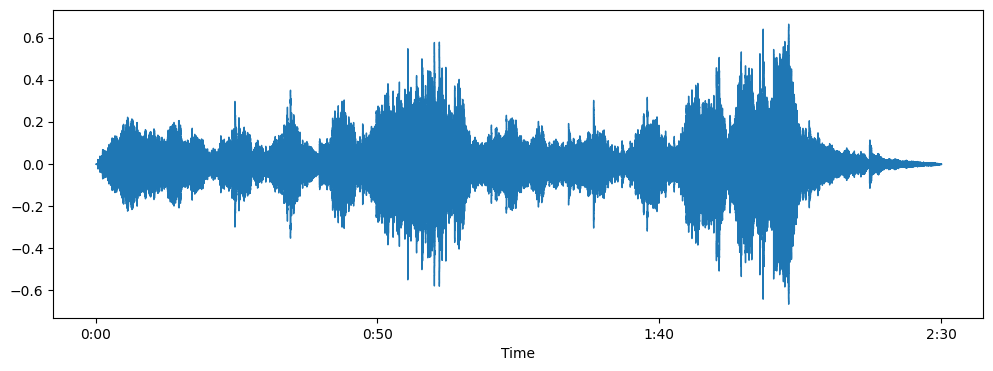

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr)
plt.show()

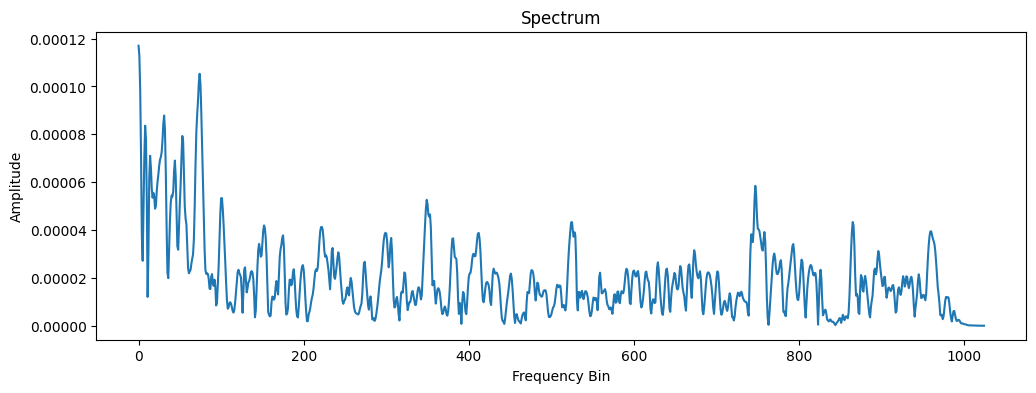

In [ ]:
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

Данный код строит график частотного спектра аудиосигнала с помощью функции stft, используя библиотеку Librosa и библиотеку Matplotlib для визуализации.


###### librosa.feature - смотрим, что может

***Функция***: `librosa.feature.chroma_cens, librosa.feature.chroma_cqt`\
***Вычисляет вариант цветности ”Нормализованная энергия цветности" (CENS)***\
Для вычисления признаков CENS после получения векторов цветности с помощью chroma_c qt выполняются следующие шаги:
1. L-1 нормализация каждого вектора цветности
2. Квантование амплитуды на основе “логарифмических” пороговых значений амплитуды
3. (необязательно), сглаживание со скользящим окном. Длина окна по умолчанию = 41 кадр
4. (не реализовано) Понижающая дискретизация

Функции CENS устойчивы к динамике, тембру и артикуляции, поэтому они обычно используются в приложениях для подбора и извлечения звука.\
***Простым языком***:\
***chroma_cens*** - это метод, который вычисляет "Chroma Energy Normalized" (CENS) вариант хромограммы. Хромограмма - это представление звукового сигнала в цветовом пространстве, которое отражает распределение частот в нотах.

CENS хромограмма, в отличие от стандартной хромограммы, вычисляется с использованием нескольких октав и нормализуется по энергии, что делает ее более устойчивой к вариациям амплитуды и более робастной к шумам в записи.

Обычно chroma_cens используется в музыкальном информационном поиске, классификации и рекомендательных системах.\
***chroma_cqt*** извлекает хроматические признаки из аудио с помощью постоянного квадратичного преобразования (CQT) и нормализует их с помощью варианта хроматической энергии (CENS).

CQT используется для извлечения спектральных признаков из аудио, которые затем преобразуются в хроматические признаки. CENS - это вариант хроматических признаков, который нормализует хроматические признаки, чтобы уменьшить влияние изменений громкости на извлеченные признаки. В результате получается хромограмма, где каждый столбец представляет распределение частот в 12-мерном хроматическом пространстве.

**Напишем код, который предназначен для вычисления хроматических признаков на основе аудио файла с помощью библиотеки Librosa. Эти признаки могут использоваться для анализа музыки, определения тональности, сравнения аудио файлов и многих других целей.**

In [ ]:
chroma_cens = ls.feature.chroma_cens(y=data, sr=sr)
chroma_cq = ls.feature.chroma_cqt(y=data, sr=sr)

Визуализация хроматических признаков

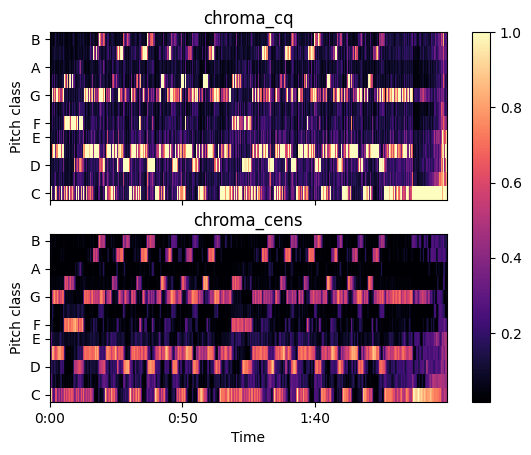

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = lr.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()
lr.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

***Функция***: `librosa.feature.chroma_stft`\
***Вычисление хромаграммы по форме волны или спектрограмме мощности.***\
This implementation is derived from chromagram_E\
Вычисление хромаграммы по форме волны или спектрограмме мощности.\
Метод ***chroma_stft*** извлекает хроматический график из звуковой волны или спектрограммы мощности. Хроматический график показывает распределение частот в музыкальной дорожке по 12 полутонам. Chroma_stft вычисляет коррелограмму с применением косинусного ядра к кратковременным Фурье-преобразованиям звукового сигнала или его спектрограммы и затем суммирует значения энергии по каждому из 12 полутоновых классов. В результате получается вектор из 12 значений, который можно использовать для анализа тонового содержания музыкального трека.

In [ ]:
S = np.abs(librosa.stft(data, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

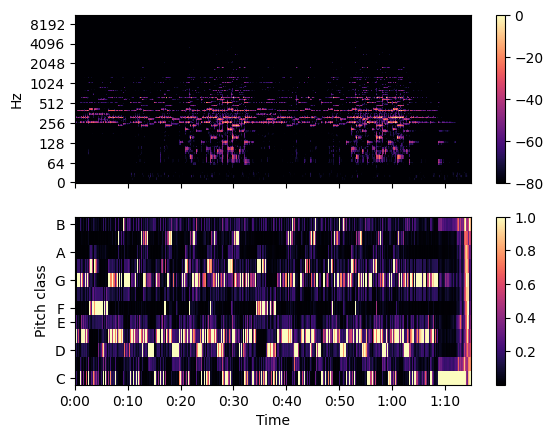

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

***Функция***: `librosa.feature.chroma_cqt`\
***Вычисление хромаграммы по форме волны или спектрограмме мощности.***\
Сравнение a long-window STFT хромограммы с CQT хромограммой

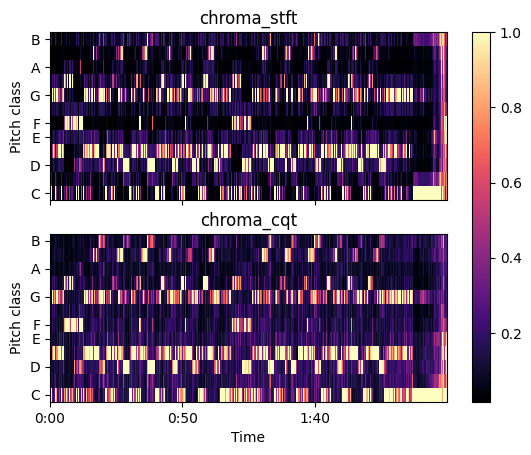

In [ ]:
import matplotlib.pyplot as plt
chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=data, sr=sr,
                                           n_chroma=12, n_fft=4096)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

***Функция***: `librosa.feature.fourier_tempogram`\
***Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope***\
Tempogram - это представление темпа, полученное путем вычисления локальных периодических автокорреляций на кратковременных спектрограммах. Он предоставляет оценку темпа музыкального сигнала в течение времени. Tempogram обычно используется в анализе ритма музыки для выявления темпа, изменений темпа, метрических моделей и других характеристик ритма в музыке.

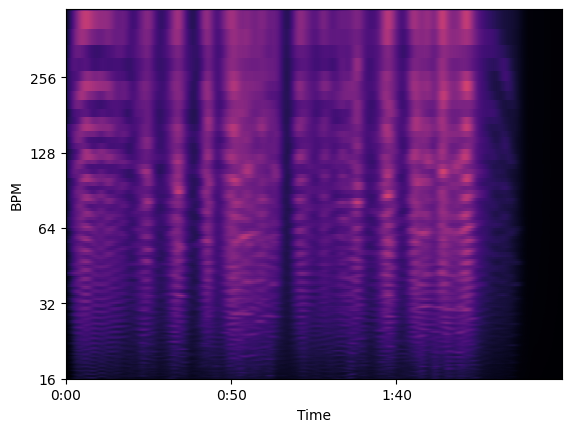

In [ ]:
oenv = librosa.onset.onset_strength(y=data, sr=sr, hop_length=512)
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                          hop_length=512, norm=None)
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=512,
                          x_axis='time', y_axis='tempo', cmap='magma')

***Функция***: `librosa.feature.mfcc`\
MFCC (Mel-Frequency Cepstral Coefficients) - это метод извлечения признаков из аудиосигналов, который используется для анализа и классификации звуков в задачах распознавания речи, музыкальной обработки и машинного зрения. Он позволяет представить спектр звука в форме вектора низкой размерности, который содержит информацию о формантах, тональности и других характеристиках звуковой волны.

Сначала алгоритм применяет оконное преобразование Фурье к коротким фрагментам аудио-сигнала, чтобы получить спектрограмму. Затем, используя мел-шкалу, спектрограмма преобразуется в мел-спектрограмму, которая отражает восприятие звука человеком. Затем, применяются кепстральные преобразования к мел-спектрограмме для извлечения MFCC коэффициентов. Как правило, используется небольшое количество коэффициентов (обычно от 12 до 20), которые представляют собой первые несколько коэффициентов кепстрального преобразования.

Коэффициенты MFCC часто используются в задачах распознавания речи для идентификации фонем и слов, а также в задачах классификации музыки для определения жанра, инструментов и т.д.

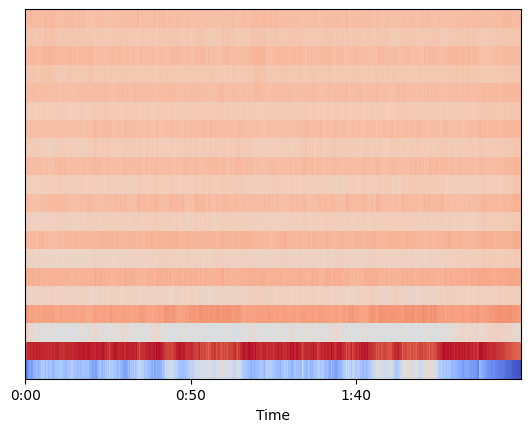

In [ ]:
m_htk = librosa.feature.mfcc(y=data, sr=sr, dct_type=3)
librosa.display.specshow(m_htk, x_axis='time')

***Функция***: `librosa.feature.rms`\
***Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.***


Функция `rms` (root-mean-square) вычисляет значение среднеквадратического отклонения для каждого фрейма аудио сигнала. В качестве входных данных, функция может принимать аудио сигнал `y`, либо спектрограмму `S`. Если входными данными является аудио сигнал, то сперва создается спектрограмма, на основе которой затем вычисляется значение rms для каждого фрейма. Значение rms показывает относительную силу аудио сигнала в каждом фрейме, и может использоваться, например, для оценки громкости сигнала.

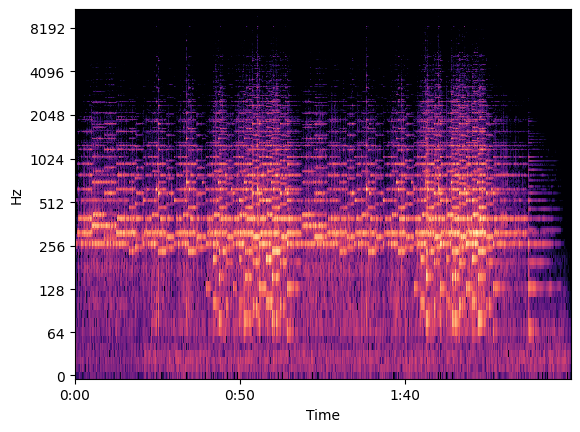

In [ ]:
S, phase = librosa.magphase(librosa.stft(data))
rms = librosa.feature.rms(S=S)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time')

In [ ]:
data.shape, ft.shape, chroma_cens.shape,chroma_cq.shape,chroma.shape,chroma_stft.shape,ac_tempogram.shape,m_htk.shape,rms.shape

((3307500,),
 (1025, 1),
 (12, 6460),
 (12, 6460),
 (12, 3230),
 (12, 6460),
 (384, 6460),
 (20, 6460),
 (1, 6460))

#### Итак, что имеем?
У нас есть куча вариантов, как обработать аудиофайл. Из них надо выбрать наиболее релевантные и непохожие друг на друга. Также имеем временной ряд *data*, который, возможно, можно как-нибудь обработать, посмотрим в дальнейшем. Во время обработки и скачивания данных со спотифай нашли интересную вещь - фичи песен от самого спотифая. Возможно, это как-то поможет